In [13]:
"""
My step into unsupervised learning.
K-means algorithm is written based on Marsland's book Machine Learning - An Algorithmic Perspective, 2nd Edition. 
Chapter 14, page 281
"""

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np

class kmeans():
    def __init__(self, n_clusters, datapoints, n_iteration):
        np.set_printoptions(suppress=True) #suppress scientific notation
        
        self.n_clusters = n_clusters
        self.datapoints = datapoints
        self.n_iteration = n_iteration
        
        self.n_datapoints = self.datapoints.shape[0]        
        self.cluster_centre = np.array(np.random.uniform(0, 1, size=self.n_clusters)) #center of each cluster
        self.distances = np.ones((self.n_clusters, self.datapoints.shape[0])) #matrix with 1 - row-cluster, column-datapoint
        self.early_stop = 0 #iteration counter - last number is early stop iteration
        
        self.all_cluster_centre_position = [] #np.zeros((self.n_clusters, self.n_iteration))
        self.list_total_error = [] #list of total errors until early stopping
        self.list_datapoints_and_cluster = [] #list of arrays with structure datapoint, cluster centre
        
        self.learning()
        self.list_datapoints_and_cluster = self.append_cluster_to_datapoint(self.datapoints, self.clustering)
     
    #compute distances between datapoints and cluster centre
    def compute_distance(self, datapoints):   
        distances = np.abs(np.transpose([self.cluster_centre]) - datapoints)
        
        return distances
    
    #assign the datapoint to the nearest cluster centre
    def assign_datapoint_nearest_cluster(self, datapoints, distances):
        clustering = np.zeros((self.n_clusters, datapoints.shape[0]))
        for i in range(datapoints.shape[0]):
            col = distances[:,i]
            min_index = np.argmin(col)
            clustering[min_index, i] = 1

        return clustering
    
        #method appends the right cluster id to each datapoint
    def append_cluster_to_datapoint(self, datapoints, clustering):
        list_datapoints_and_cluster = []
        for i in range(datapoints.shape[0]):
            index = int(str(np.where(clustering[:, i] == 1.)[0]).replace("[", "").replace("]", "")) #look for better solution here
            list_datapoints_and_cluster.append([datapoints[i], index])
        
        return list_datapoints_and_cluster
    
    #############
    # learning #
    ###########
    
    def learning(self):
        for i1 in range(self.n_iteration):
            #######################
            # for each datapoint #
            #####################
            self.all_cluster_centre_position.append(self.cluster_centre) #append current cluster centre to the list
            self.clustering = np.zeros((self.n_clusters, self.datapoints.shape[0])) #create a zero matrix
                                    
            self.distances = self.compute_distance(self.datapoints)
            self.clustering = self.assign_datapoint_nearest_cluster(self.datapoints, self.distances)           
            
            ############################
            # for each cluster centre #
            ##########################
            
            n_points_in_cluster = np.sum(self.clustering, axis=1)
            #calculate new cluster centre
            cluster_centre_new = 1/n_points_in_cluster * np.sum(self.datapoints * self.clustering, axis=1)

            #calculate cluster centre error
            cluster_centre_error = (self.cluster_centre - cluster_centre_new) ** 2

            total_error = np.sum(cluster_centre_error)
            self.list_total_error.append(total_error)
            
            #early stopping when error = 0
            if total_error == 0:
                self.early_stop = i1
                break

            #assign new values to centres
            self.cluster_centre = cluster_centre_new
    
    #########
    # test #
    #######
    
    def test(self, test_datapoints):
        test_distances = self.compute_distance(test_datapoints) #compute distance to every cluster centre
        test_clustering = self.assign_datapoint_nearest_cluster(test_datapoints, test_distances) #assign datapoint to nearest cluster
        test_datapoints_and_cluster = self.append_cluster_to_datapoint(test_datapoints, test_clustering) #append cluster to datapoint
        self.draw_datapoints(test_datapoints_and_cluster) #graphical presentation
    
    ##########
    # graph #
    ########
    
    def draw_datapoints_before_clustering(self):
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.title('Datapoints. Size: '+ str(self.n_datapoints))
        plt.plot(self.datapoints, self.datapoints, 'bo')
    
    def draw_datapoints(self, list_datapoints_and_cluster, stage='T'):
        plt.xlim(0,1)
        plt.ylim(0,1)
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
        if stage == 'L':
            plt.title('Clustered datapoints. Number of clusters: '+ str(self.n_clusters))
        for i in range(len(list_datapoints_and_cluster)):
            point = list_datapoints_and_cluster[i][0]
            cluster = list_datapoints_and_cluster[i][1]
            plt.plot(point, point, colors[cluster]+'o')
    
    def draw_clustered_datapoints(self):
        self.draw_datapoints(self.list_datapoints_and_cluster, 'L')
        
    def draw_total_error(self):
        plt.plot(self.list_total_error)
        plt.ylabel('Total error')
        plt.xlabel('Iteration')
        plt.title('Total error per iteration\nNumber of max iterations: ' + str(self.n_iteration) + '\nEarly stopping at ' + str(self.early_stop))
        
    def draw_cluster_centre(self):
        plt.ylabel('Value')
        plt.xlabel('Iteration')
        plt.title('Cluster centre adjustement per iteration')
        arr = np.array(self.all_cluster_centre_position)
        for i in range(self.n_clusters):
            cluster_points = arr[:,i]
            plt.plot(cluster_points)
    
#end class kmeans
        
##run
n_datapoints = 130
n_cluster = 8 #limited to 8 because of number of colors when drawing the clustered graph
n_iteration = 10
n_test_datapoint = 20

datapoints = np.array(np.random.uniform(0, 1, size=n_datapoints)) #generate datapoints
k = kmeans(n_cluster, datapoints, n_iteration)
test_datapoints = np.array(np.random.uniform(0, 1, size=n_test_datapoint))

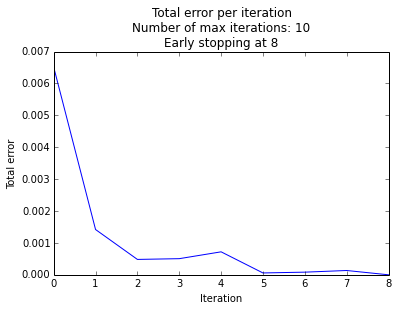

In [14]:
k.draw_total_error()

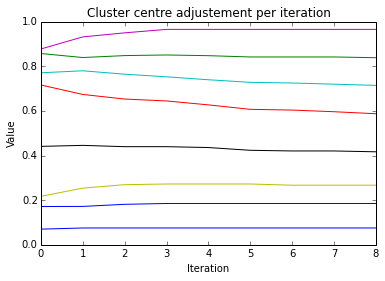

In [15]:
k.draw_cluster_centre()

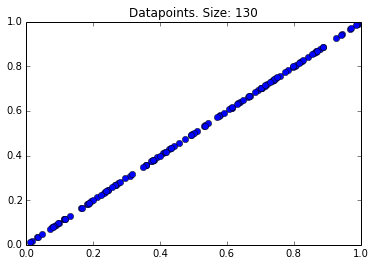

In [16]:
k.draw_datapoints_before_clustering()

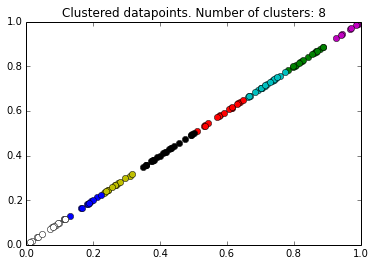

In [17]:
k.draw_clustered_datapoints()

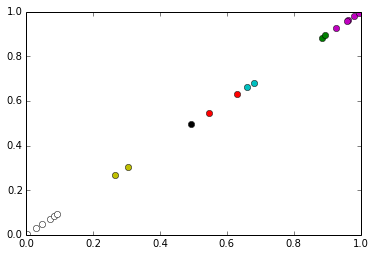

In [18]:
k.test(test_datapoints)